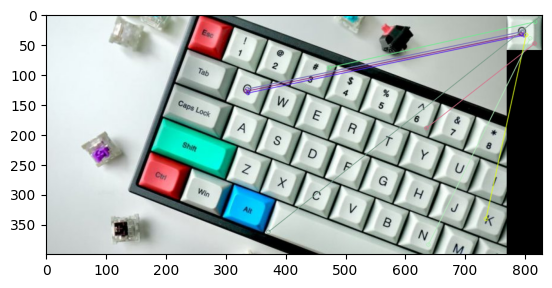

In [2]:
# Contoh Script untuk feature detection and Matching
# Modifikasi script ini untuk mencoba metode yang berbeda
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Gunakan gambar yang ada pada laptop masing-masing
img1 = cv2.imread('keyboard.jpg')  # Gambar yang dituju
img2 = cv2.imread('huruf q.jpg')  # Gambar yang dicari

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Menggunakan Detector SIFT
sift = cv2.SIFT_create()

# Mencari Keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Melakukan Matching dari hasil deteksi keypoints menggunakan BruteForce Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Mengurutkan matches berdasarkan jarak terdekat
matches = sorted(matches, key=lambda x: x.distance)

# Memilih 10 kecocokan terbaik
good = matches[:10]

# Menggambar hasil match pada gambar baru (img3)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Menampilkan gambar hasil
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()